In [290]:
# **I. Explarotory data analysis**

## **I.1. General exploration**





In [291]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [292]:
# Loading Train set
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
print(f"Train set shape:\n{df_train.shape}\n")

# Loading Test set
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
print(f"Test set shape:\n{df_test.shape}")

Train set shape:
(1460, 81)

Test set shape:
(1459, 80)


In [293]:
# summary of each of the variables in train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [294]:
#summary of dataset
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00",...,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00",...,857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


**We can notice that many columns have missing data. I will handlle these in next upcoming cells</font>**

In [295]:
# Checking if all columns are the same in both data set or not using list comprehension function
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


* **The 'SalePrice' column present in the train set but not in  test set .it is a target variable,we have to predict that variable for test dataset. So no worries**
* **And remaining columns in both data set are same**

In [296]:
# Drop the 'Id' column from the train set because this is not usefull for predicton
df_train.drop(["Id"], axis=1, inplace=True)

# Save the list of 'Id' before dropping it from the test set
Id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

## **I.2. Numerical features**

### **I.2.1. Explore and clean Numerical features**

In [297]:
# Let's select the columns of the train set with numerical data 
df_train_num = df_train.select_dtypes(include=["number"])
df_train_num.shape

(1460, 37)

In [298]:
# Let's drop quasi-constant features where 95% of the values are similar or constant
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_train_num.iloc[:, :-1])

# Get the number of features that are not constant
print("Number of retained features:",sum(sel.get_support()))
print("\nNumber of quasi_constant features:", {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())})

quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-1].columns 
                                  if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]
print("\nQuasi-constant features to be dropped:",quasi_constant_features_list)

# Let's drop these columns from df_train_num 
df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 35

Number of quasi_constant features: {1}

Quasi-constant features to be dropped: ['KitchenAbvGr']


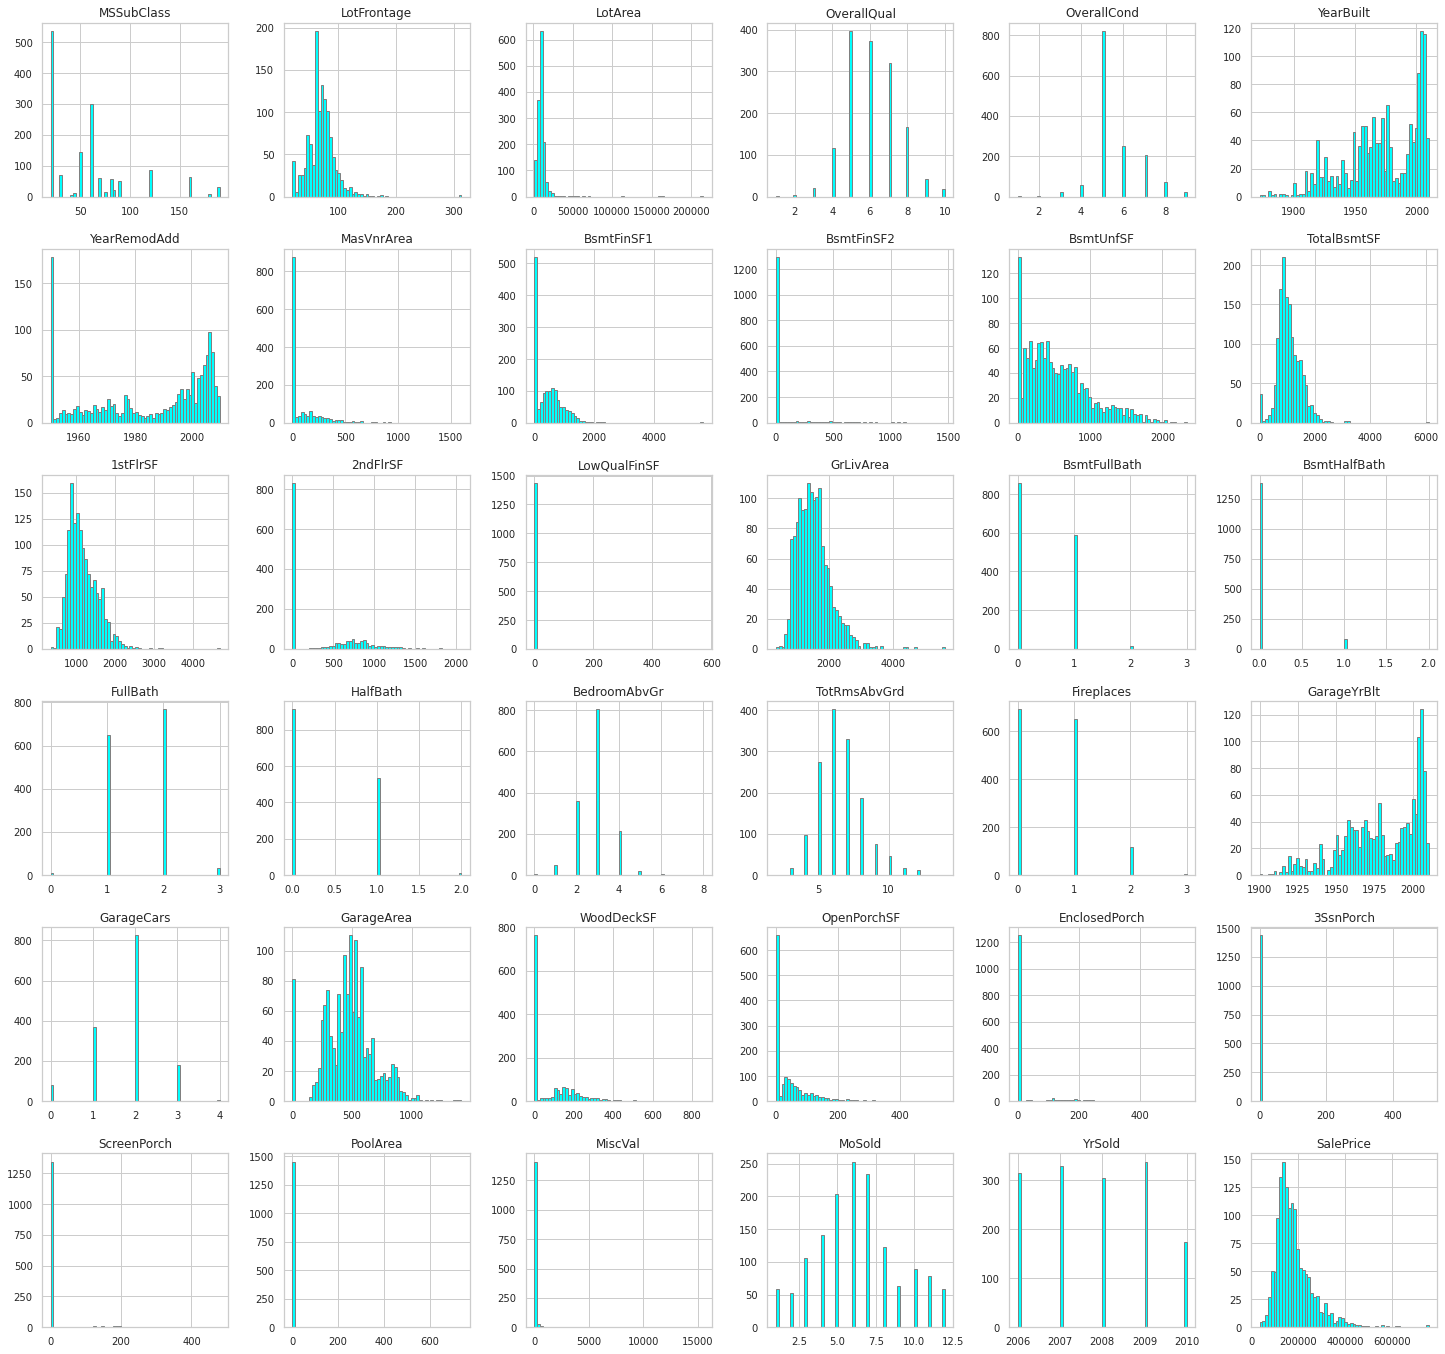

In [299]:
# Plot the distribution of all the numerical data
fig_ = df_train_num.hist(figsize=(25, 24), bins=60, color="cyan",
                         edgecolor="gray", xlabelsize=10, ylabelsize=10)

<AxesSubplot:>

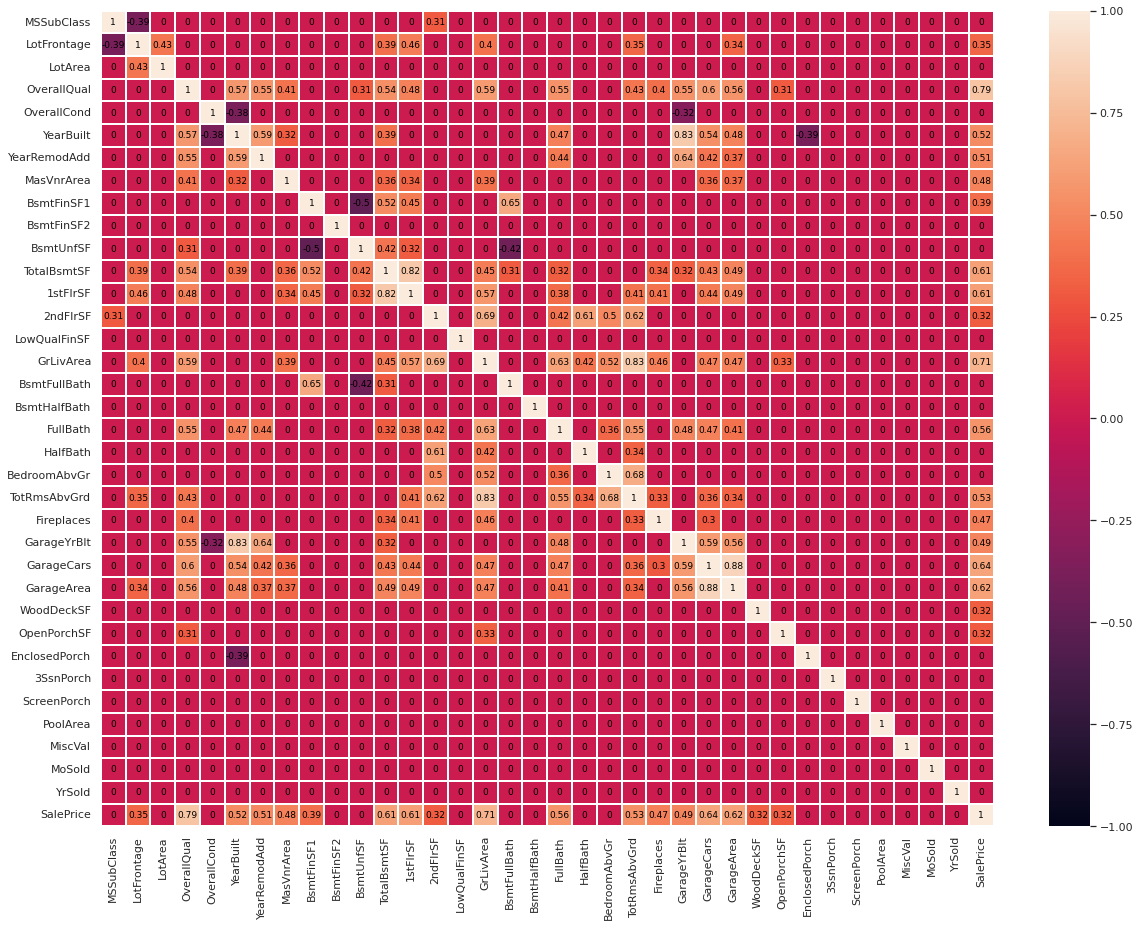

In [300]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df_train_num.corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# plot the heatmap
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"},annot=True)

**From the distribution of each numerical variables as well as the heatmap we can notice 18 features that are important and correlated (correlation higher than absolute 0.3) with our target variable 'SalePrice'.**
    
**We can also notice that a lot of features are correlated with each other. I will handle these correlation while selecting the features for our models.**

In [301]:
# Let's select features where the correlation with 'SalePrice' is higher than |0.3|
# -1 because the latest row is SalePrice
df_num_corr = df_train_num.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.5)
high_features_list = df_num_corr[abs(df_num_corr) >= 0.5].sort_values(ascending=False)
print(f"{len(high_features_list)} strongly correlated variables with SalePrice:\n{high_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
low_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(low_features_list)} weekly correlated variables with SalePrice:\n{low_features_list}")

10 strongly correlated variables with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

8 weekly correlated variables with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


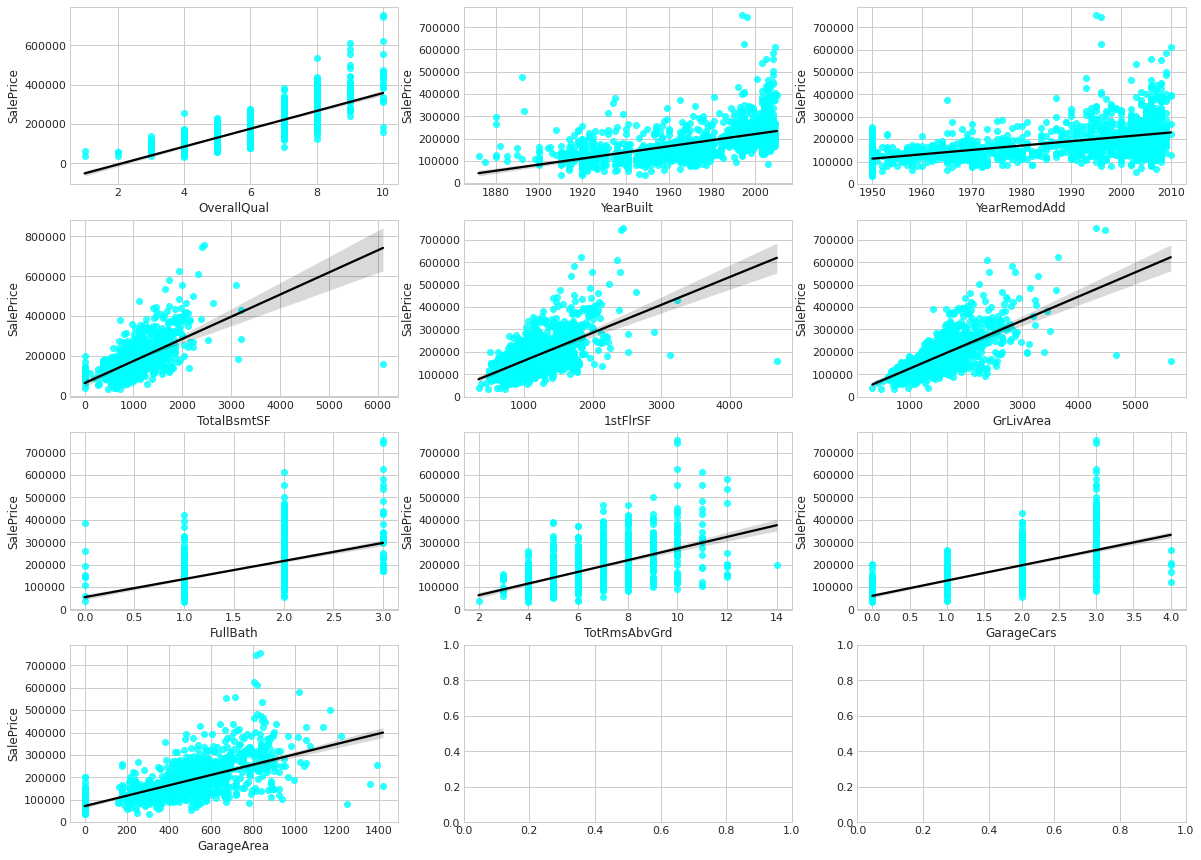

In [302]:
# Features with high correlation (higher than 0.5)
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(x=strong_features[i], y="SalePrice", data=df_strong_features, ax=ax, scatter_kws={
                    "color": "cyan"}, line_kws={"color": "black"})

**Above features are strongly/highly correlated variables with regplot**

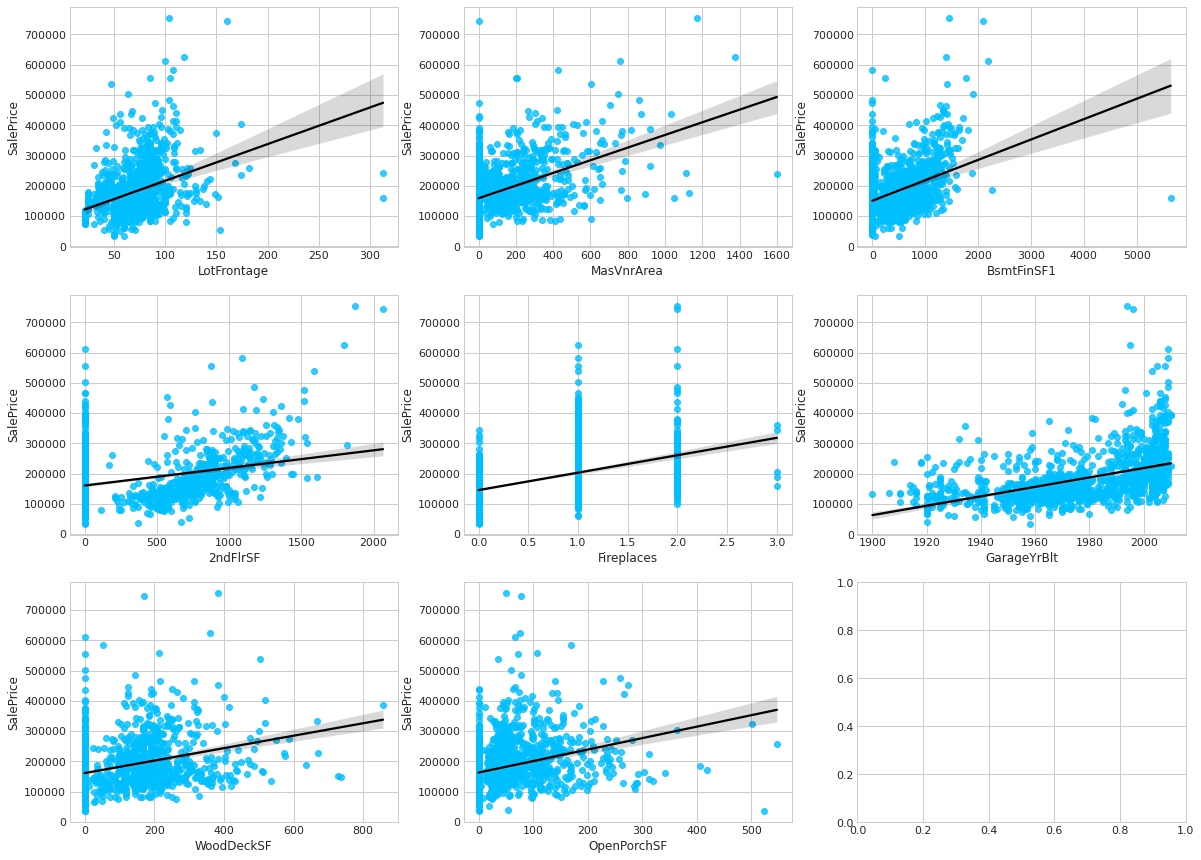

In [303]:
# Features with low correlation (between 0.3 and 0.5)
low_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (
    abs(df_num_corr) < 0.5)].index.tolist()
low_features.append("SalePrice")

df_low_features = df_train_num.loc[:, low_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(low_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(low_features) - 1:
        sns.regplot(x=low_features[i], y="SalePrice", data=df_low_features, ax=ax, scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "black"},)

**Here we can notice several houses where the price is not expensive (less than 250 000 dollars) for the corresponding surface ('TotalBsmtSF', '1stFlrSF', 'GrLivaArea' etc.). It is better to remove these observations to avoid influencing the prediction model.**
**There is too much price variation for an area equal to 0, e.g. 'WoodDeckSF', 'OpenPorchSF' etc, will drop these outliers at the end of the data mining.**

In [304]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + low_features

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except 'SalePrice')
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

**Here I kept the 18 most correlated numerical features with 'SalePrice'**

###  **I.2.2. Missing data of Numerical features**

### **Train set**

Text(0.5, 1.0, 'Percent of missing values for column of the train set\n')

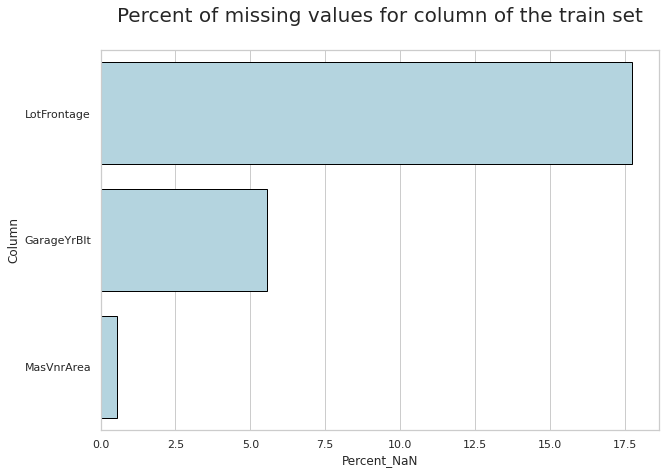

In [305]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="lightblue")

p.set_title("Percent of missing values for column of the train set\n", fontsize=20)

## **Handling Missing values**
### **Imputation**

**Imputation is technique used for replacing the missing data with some reasonable value(Mean,Median and Mode) to retain most of the data or information of the dataset.**

**Here Im using KNN Imputer, The idea in kNN methods is to identify 'k' samples in the dataset that are similar or close in the space. Then we use these 'k' samples to estimate the value of the missing data points. Each sample's missing values are imputed using the mean value of the 'k'-neighbors found in the dataset. It can give important information to predict the value of our dependent vairable.**

In [306]:
#importing knnimputer from sklearn
from sklearn.impute import KNNImputer
my_imputer=KNNImputer(n_neighbors=2)
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))
df_train_imputed.columns = df_train_num.columns

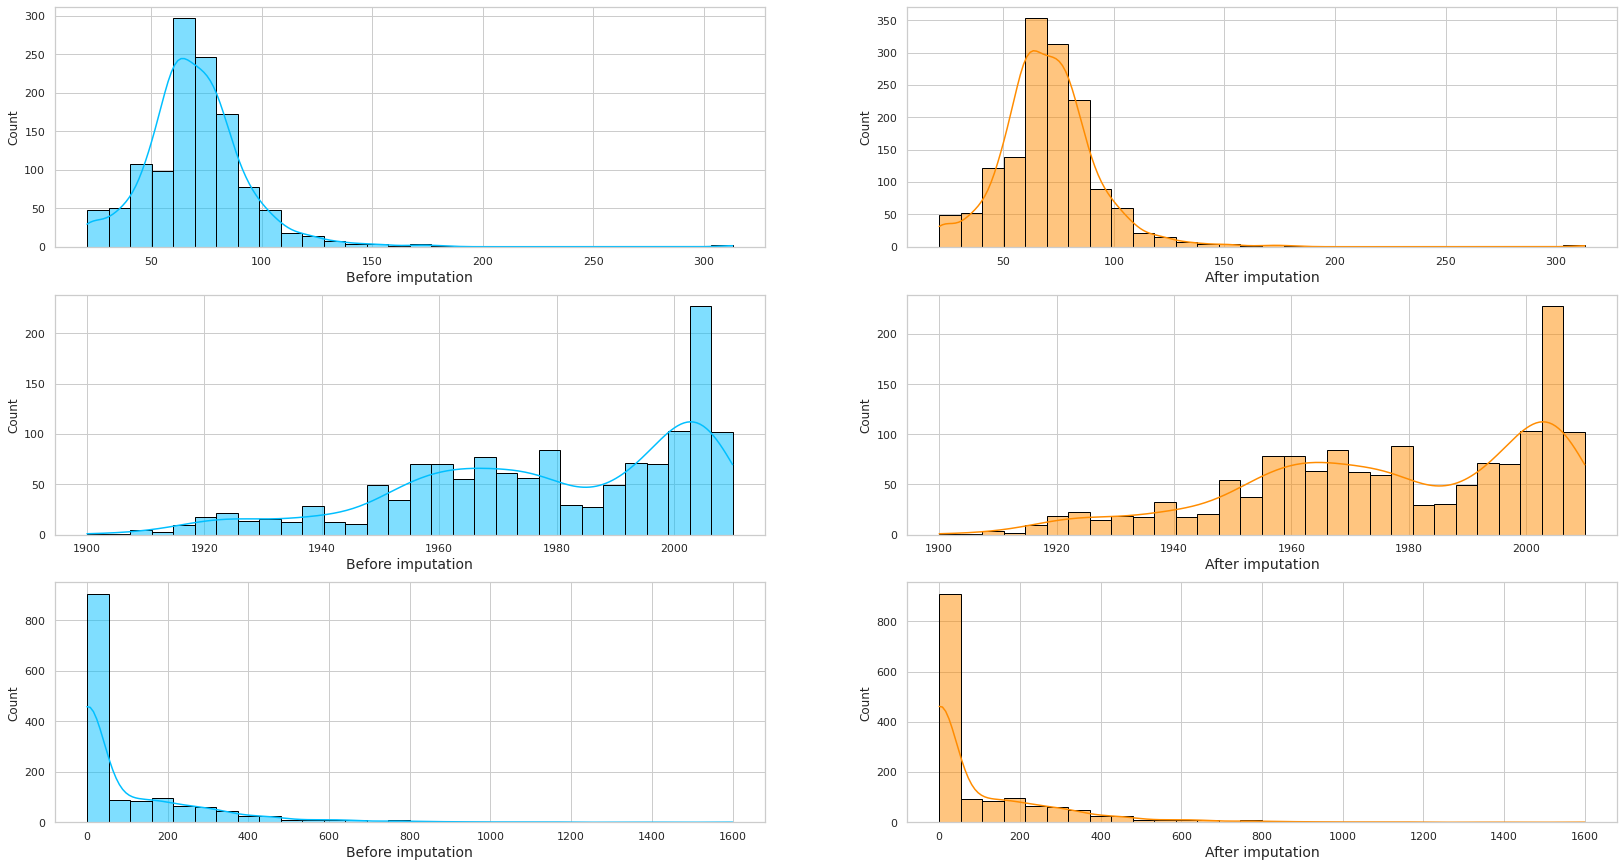

In [307]:
# Let's check the distribution of each imputed feature before and after imputation
# Define figure parameters
sns.set(rc={"figure.figsize": (28, 15)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)
# Plot the results
for feature, fig_pos in zip(["LotFrontage", "GarageYrBlt", "MasVnrArea"], [0, 1, 2]):
    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_xlabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black")
    q.set_xlabel(f"After imputation", fontsize=14)

**For "LotFrontage" distributions is changed after imputations. and others remains the same so we just drop this feature**


In [308]:
# Drop 'LotFrontage'
df_train_imputed.drop(["LotFrontage"], axis=1, inplace=True)
df_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,SalePrice
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,196.00,706.00,854.00,0.00,"2,003.00",0.00,61.00,"208,500.00"
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,0.00,978.00,0.00,1.00,"1,976.00",298.00,0.00,"181,500.00"
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,162.00,486.00,866.00,1.00,"2,001.00",0.00,42.00,"223,500.00"
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,0.00,216.00,756.00,1.00,"1,998.00",0.00,35.00,"140,000.00"
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,350.00,655.00,"1,053.00",1.00,"2,000.00",192.00,84.00,"250,000.00"


### **Test set**

**The columns that have been deleted in the train set must also be deleted in the test set so that the two data sets remain identical for the modeling and prediction.**

In [309]:
# Drop the same features from test set as for the train set
df_test_num.drop(["LotFrontage"], axis=1, inplace=True)

Text(0, 0.5, 'Columns\n')

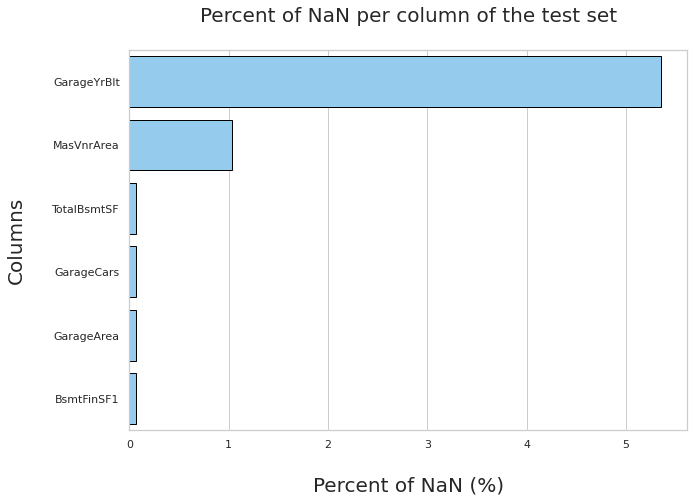

In [310]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="lightskyblue")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Columns\n", fontsize=20)

## **Handling Missing values**
### **Imputation**

**Imputation is technique used for replacing the missing data with some reasonable value(Mean,Median and Mode) to retain most of the data or information of the dataset.**

**Here Im using KNN Imputer, The idea in kNN methods is to identify 'k' samples in the dataset that are similar or close in the space. Then we use these 'k' samples to estimate the value of the missing data points. Each sample's missing values are imputed using the mean value of the 'k'-neighbors found in the dataset. It can give important information to predict the value of our dependent vairable.**

In [311]:
#importing knnimputer from sklearn
from sklearn.impute import KNNImputer
my_imputer=KNNImputer(n_neighbors=2)
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

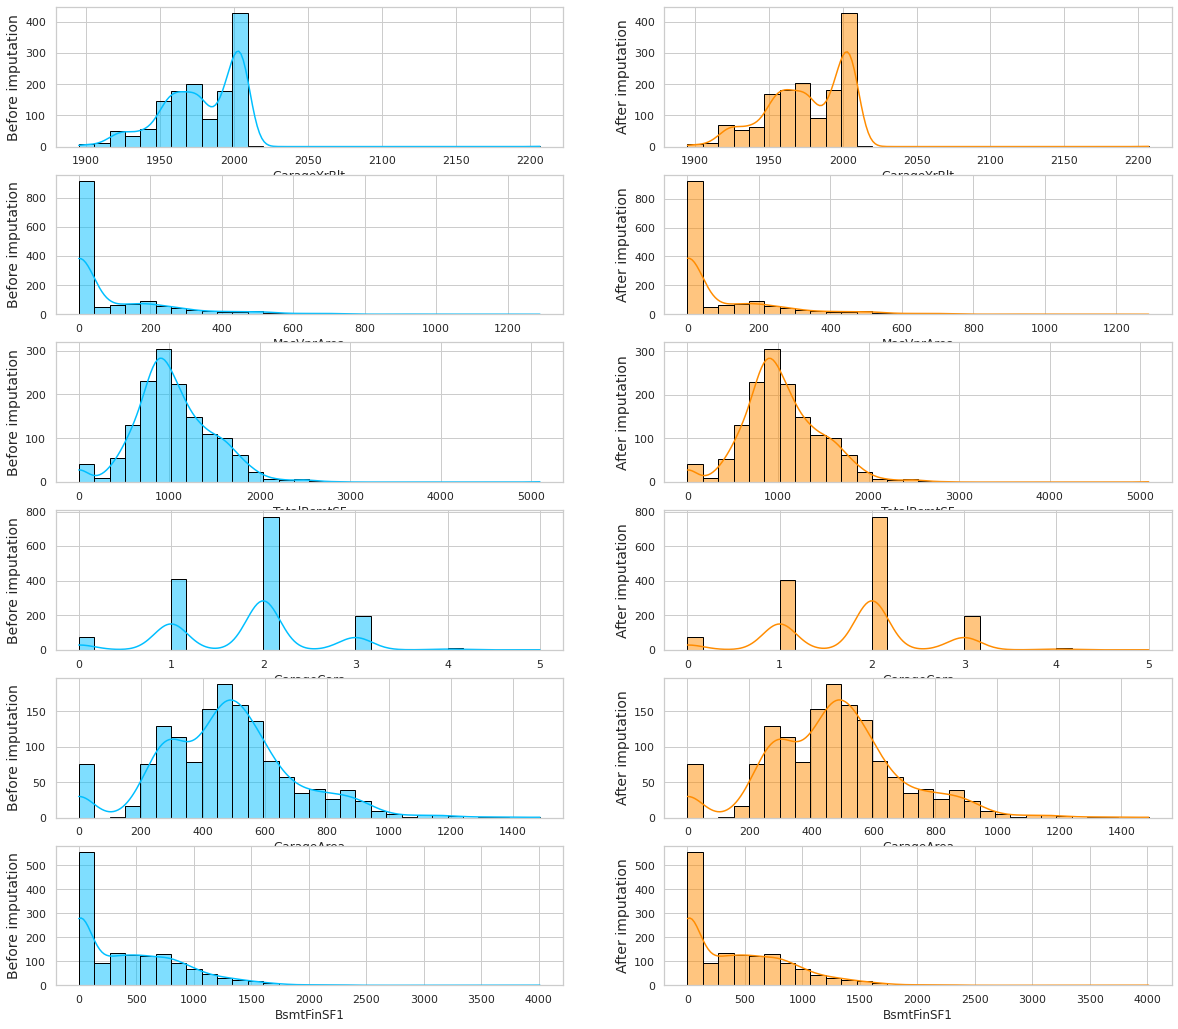

In [312]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(6, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_test_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_test_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black",)
    q.set_ylabel(f"After imputation", fontsize=14)

**The percentage of NaN in each of these fetaures did not exceed 1.5%. Thus, by imputing these missing data, few errors were introduced and the distributions are similar before and after imputation.**

## **I.3. Categorical features**

### **I.3.1. Explore and clean Categorical features**

In [313]:
# Categorical to Quantitative relationship
categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("SalePrice")

# Train set
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

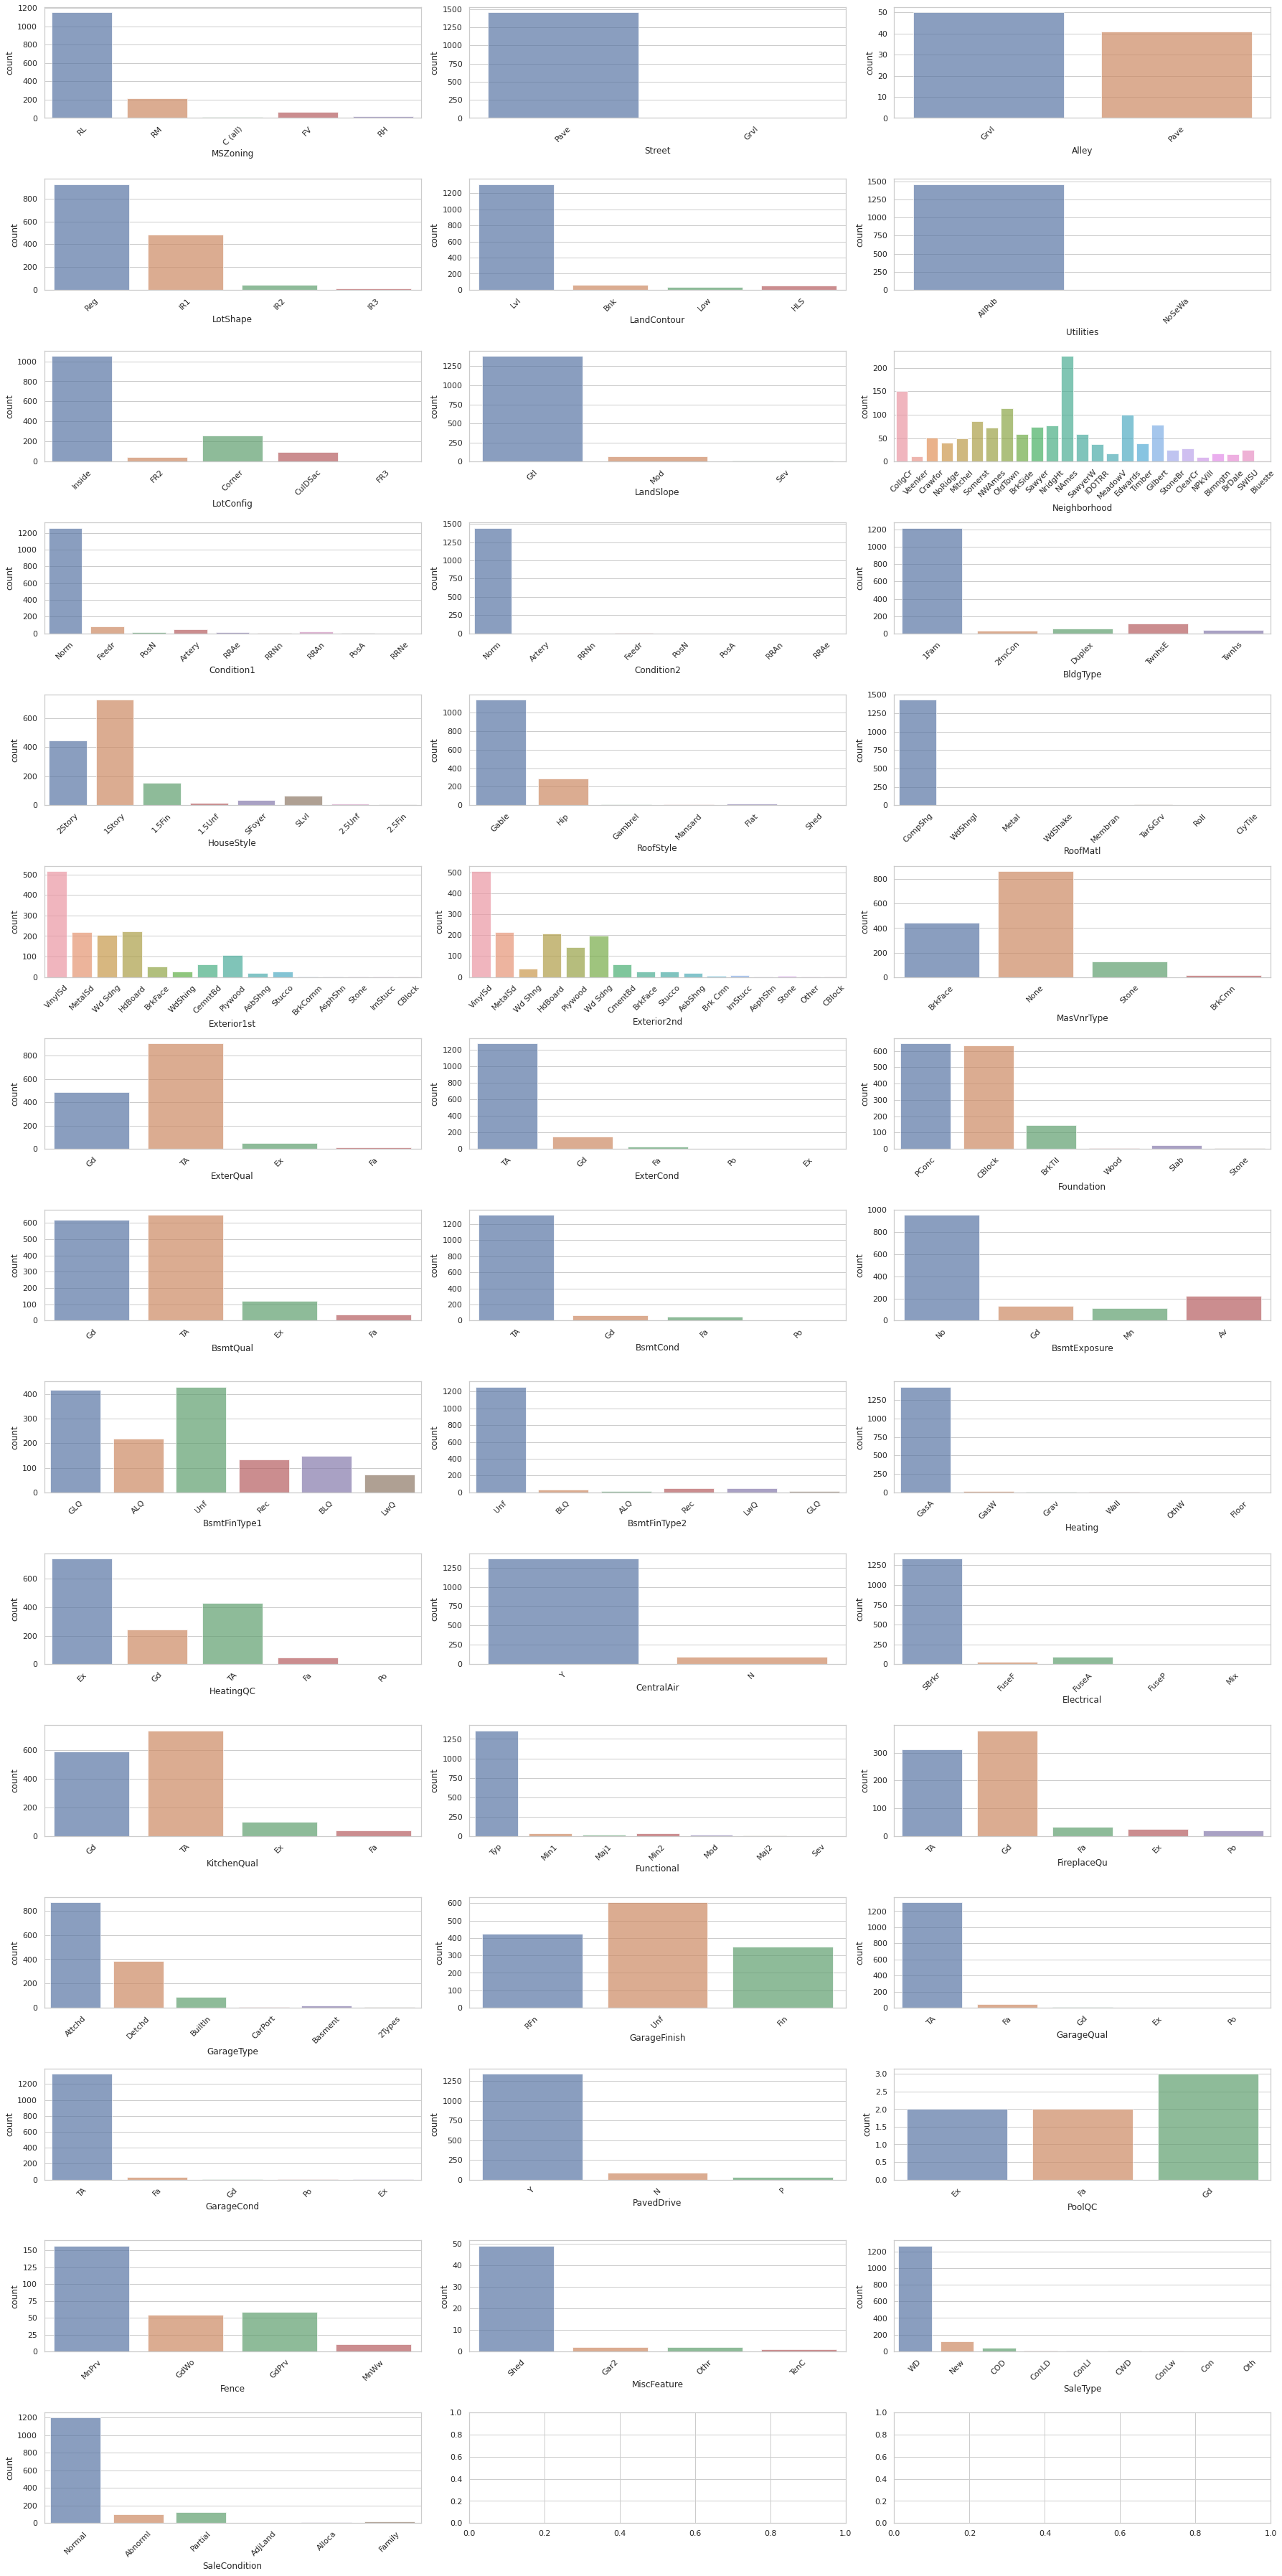

In [314]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    round(len(df_train_categ.columns) / 3), 3, figsize=(25, 50))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax)

fig.tight_layout()

**By looking above plots we can notice that for some categorical feature the observation are concentrated in a single level of the category. These features are less informative for our model, so it would be better to remove them.**

In [315]:
# Drop some categorical 'non-informative' features from train set
columns_to_drop = [
    "Street",
    "Alley",
    "LandContour",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "CentralAir",
    "GarageQual",
    "GarageCond",
    "SaleType",
    "PavedDrive",
    "LandContour",
    "ExterCond",
    "GarageCond",
    "Heating",
    "MiscFeature",
    "BsmtFinType2",
    "Functional"
]

# Train set
df_train_categ.drop(columns_to_drop, axis=1, inplace=True)

# Test set
df_test_categ.drop(columns_to_drop, axis=1, inplace=True)

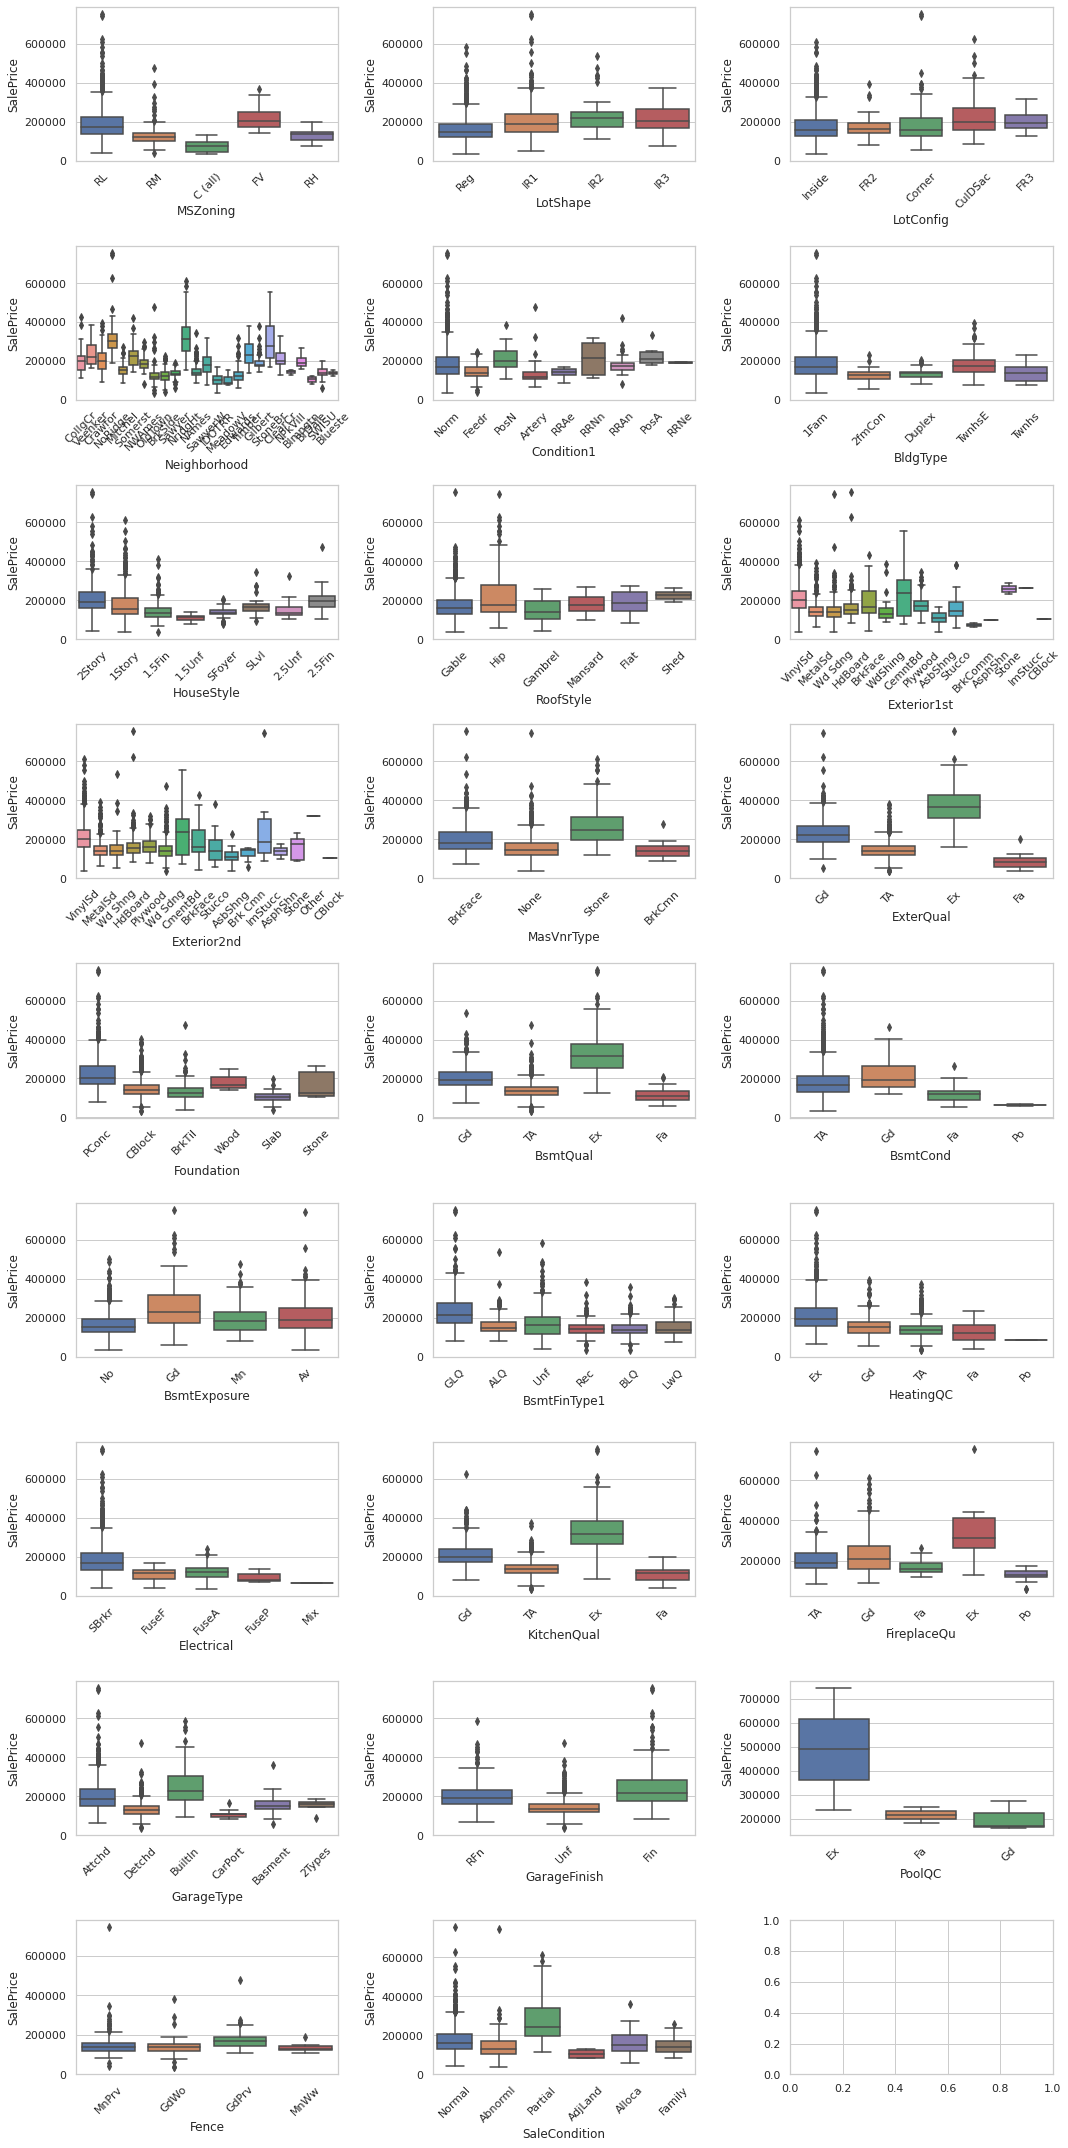

In [316]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(
            x=df_train_categ.columns[i], y="SalePrice", data=df_train_categ, ax=ax)

fig.tight_layout()

**Some of these features seem to be codependent such as 'Exterior1st' &  'Exterior2nd', 'BsmtQual' & 'BsmtCond', 'MasVnrType' & 'ExterQual' etc.**
**So let's plot the contingency table and perform the Chi square test in order to identify these codependency.**

In [317]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual", "BsmtQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtCond", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = df_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n
    
    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i], columns=df_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54

P-Value of the ChiSq Test bewteen BsmtQual and BsmtCond is: 1.9371809126533347e-31

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32



**p-value is significant for all tests so there is some co-dependence between these variables. For this I will drop 'Exterior2nd', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' and 'MasVnrType'**

In [318]:
# Let's drop the one of each co-dependent variables
# Train set
df_train_categ.drop(Y, axis=1, inplace=True)

# Test set
df_test_categ.drop(Y, axis=1, inplace=True)

###**I.3.2. Missing data in Categorical features**

### **Train set**

Text(0, 0.5, 'Column Name\n')

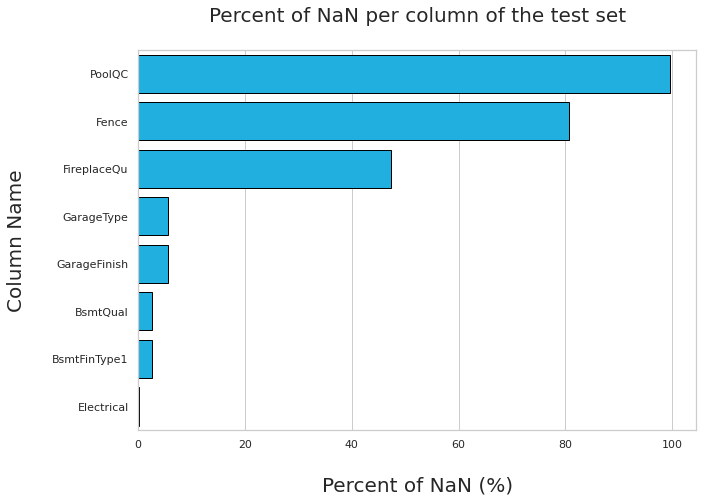

In [319]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

**Drop the features where the percentage of NaN is higher than 5% to avoid introducing any error. Than impute the NaN of 'BsmtQual' and 'Electrical' by the corresponding modal class**

In [320]:
# Drop the features where the percentage of NaN is higher than 5%
df_train_categ.drop(["PoolQC", "Fence", "FireplaceQu",
                     "GarageType", "GarageFinish"], axis=1, inplace=True,)

In [321]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0],
                   "Electrical": df_train_categ["Electrical"].mode().iloc[0]}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)

### **Test set**

**The columns that have been deleted in the train set must also be deleted in the test set so that the two data sets remain identical for the modeling and prediction.**

In [322]:
# Drop the same features from test set as for the train set
df_test_categ.drop(["PoolQC", "Fence", "FireplaceQu",
                    "GarageType", "GarageFinish"], axis=1, inplace=True,)

Text(0, 0.5, 'Column Name\n')

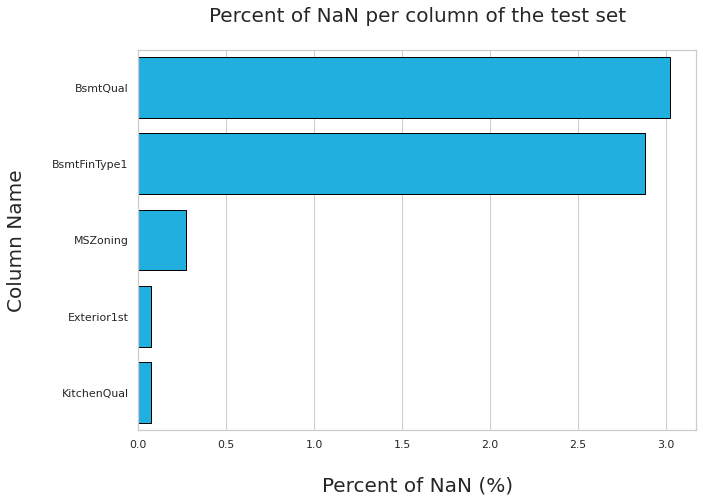

In [323]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_categ.columns[df_test_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_categ[i].isnull().sum() * 100 / len(df_test_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [324]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"BsmtQual": df_test_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_test_categ["BsmtFinType1"].mode().iloc[0],
                   "MSZoning": df_test_categ["MSZoning"].mode().iloc[0],
                   "Exterior1st": df_test_categ["Exterior1st"].mode().iloc[0],
                   "KitchenQual": df_test_categ["KitchenQual"].mode().iloc[0]}

df_test_categ = df_test_categ.fillna(value=categ_fill_null)

### **I.3.3. Encoding Categorical features (using get_dummies)**

In [325]:
# Train set
for i in df_train_categ.columns.tolist()[:-1]:
    df_dummies = pd.get_dummies(df_train_categ[i], prefix=i)

    # merge both tables
    df_train_categ = df_train_categ.join(df_dummies)

# Select the binary features only
df_train_binary = df_train_categ.iloc[:, 18:]
df_train_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [326]:
# Test set
for i in df_test_categ.columns.tolist():
    df_dummies = pd.get_dummies(df_test_categ[i], prefix=i)

    # merge both tables
    df_test_categ = df_test_categ.join(df_dummies)

# Select the binary features only
df_test_binary = df_test_categ.iloc[:, 17:]
df_test_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


**We can notice that in df_test_binary there is 118 columns while in df_train_binary there is 122. Let's see which columns are missing from df_test_binary**

In [327]:
# Let's check if the column headings are the same in both data set, df_train and df_test
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(
    f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_train_binary.columns]
print(
    f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Electrical_Mix']

Features present in df_test_categ set and absent in df_train_categ: []


**Four of the binary features are absent from the test set. Thus, these features will be dropped from the train in order to have the same columns in both data set**

In [328]:
# Let's drop these columns from df_train_binary
df_train_binary.drop(dif_1, axis=1, inplace=True)

# Check again if the column headings are the same in both data set
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(
    f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_train_binary.columns]
print(
    f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: []

Features present in df_test_categ set and absent in df_train_categ: []


**Both data set have the same featues now**

##**I.4. Merge numerical and binary features into one data set**

In [329]:
# Add binary features to numreical features
# Train set
df_train_new = df_train_imputed.join(df_train_binary)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = df_test_imputed.join(df_test_binary)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 136)
Test set: (1459, 135)


## **I.5. Drop outliers from the train set**

**Previoulsy in the part 'I.2. Numerical Features' of this notebook I noticed some houses with large surface ("GrLivArea", "TotalBsmtSF" and "GarageArea") and with a very low Price. It is better for our models to drop theese outliers.**
    
**I also noticed for both features "WoodDeckSF" and "OpenPorchSF" a high number of 0 values with a correspondingly high price variation. These outliers should be deleted.**
**However, since the number of these outliers is very important, the best thing to do is to drop these columns.**

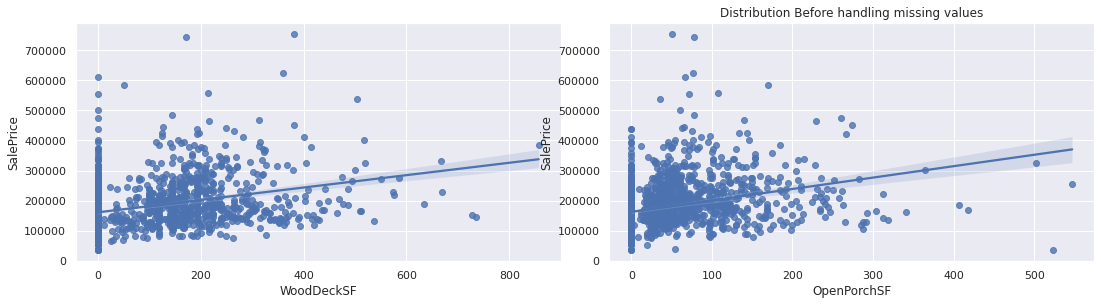

In [330]:
sns.set(style="darkgrid")                                        # setting grid to plots
fig,((ax1,ax2))=plt.subplots(1,2,figsize=(15,4))                # Plotting size of figure
fig.tight_layout()                                            # Plotting layout of each subplot
sns.regplot(df_train_new['WoodDeckSF'], df_train_new['SalePrice'],ax=ax1)
sns.regplot(df_train_new['OpenPorchSF'],df_train_new['SalePrice'] ,ax=ax2)
plt.title("Distribution Before handling missing values") 
plt.show()

In [331]:
# Drop "WoodDeckSF" and "OpenPorchSF"
df_train_new.drop(["WoodDeckSF", "OpenPorchSF"], axis=1, inplace=True)
df_test_new.drop(["WoodDeckSF", "OpenPorchSF"], axis=1, inplace=True)

In [332]:
# Let's handle the outliers in "GrLivArea", "TotalBsmtSF" and "GarageArea"
# Outliers in "GrLivArea"
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

# Outliers in "TotalBsmtSF"
outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 3000) & (
    df_train_new["SalePrice"] <= 400000)].index.tolist()

# Outliers in "GarageArea"
outliers3 = df_train_new[(df_train_new["GarageArea"] > 1200) & (
    df_train_new["SalePrice"] <= 300000)].index.tolist()

# List of all the outliers
outliers = outliers1 + outliers2 + outliers3
outliers = list(set(outliers))
print(outliers)

# Drop these outlier
df_train_new = df_train_new.drop(df_train_new.index[outliers])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)

[1061, 581, 1190, 523, 332, 1298]


#**II. Feature engineering**

**While looking closley at the remaining features, we can notice that several of them designate a given surface of the property. Thus, I will try to combine some of these surfaces into indicators without losing the information they provide.**
    
**In addition, I will turn years into age, e.g. year of construction will be transformed into age of the house since the construction.**

In [333]:
# Define a function to calculate the occupancy rate of the first floor of the total living area

def floor_occupation(x):
    """First floor occupation of the total live area

    floor_occupation equation has the following form:
    (1st Floor Area * 100) / (Ground Live Area)
    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Ground Live Area = 0
        equation -- if Ground Live Area > 0
    """
    if x["GrLivArea"] == 0:
        return 0
    else:
        return x["1stFlrSF"] * 100 / x["GrLivArea"]


# Apply the function on train and test set
df_train_new["1stFlrPercent"] = df_train_new.apply(
    lambda x: floor_occupation(x), axis=1)

df_test_new["1stFlrPercent"] = df_test_new.apply(
    lambda x: floor_occupation(x), axis=1)

# Drop "1stFlrSF" and "2ndFlrSF"
df_train_new.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)
df_test_new.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

In [334]:
# Define a function to calculate the occupancy rate of the finished basement area


def bsmt_finish(x):
    """Propotion of finished area in basement 

    bsmt_finish equation has the following form:
    (Finished Basement Area * 100) / (Total Basement Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Total Basement Area = 0
        equation -- if Total Basement Area > 0
    """
    if x["TotalBsmtSF"] == 0:
        return 0
    else:
        return x["BsmtFinSF1"] * 100 / x["TotalBsmtSF"]


# Apply the function on train and test set
df_train_new["BsmtFinPercent"] = df_train_new.apply(
    lambda x: bsmt_finish(x), axis=1)

df_test_new["BsmtFinPercent"] = df_test_new.apply(
    lambda x: bsmt_finish(x), axis=1)

# Drop "BsmtFinSF1"
df_train_new.drop(["BsmtFinSF1"], axis=1, inplace=True)
df_test_new.drop(["BsmtFinSF1"], axis=1, inplace=True)

In [335]:
# Convert Year of construction to Age of the house since the construction
df_train_new["AgeSinceConst"] = (
    df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"])

df_test_new["AgeSinceConst"] = df_test_new["YearBuilt"].max() - \
    df_test_new["YearBuilt"]

# Drop "YearBuilt"
df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [336]:
# Convert Year of remodeling to Age of the house since the remodeling
df_train_new["AgeSinceRemod"] = (
    df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"])

df_test_new["AgeSinceRemod"] = (
    df_test_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"])

# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

**To avoid redundancy and to mitigate the strong variations of some features according to the SalePrice. I will use a Boxcox transformation for skewed features. Generally in real estate, as the area of the property increases, the price per square feet decreases, hence the use of Boxcox will giving good accuracy with low RMSC more than log transfermation.**

In [337]:
continuous_features = ["OverallQual", "TotalBsmtSF", "GrLivArea",
                       "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea",
                       "MasVnrArea", "Fireplaces", "1stFlrPercent",
                       "BsmtFinPercent", "AgeSinceConst", "AgeSinceRemod"]
df_skew_verify = df_train_new.loc[:, continuous_features]

In [338]:
# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame({"Columns": continuous_features,
                          "Abs_Skew": skew_ft})

sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['GrLivArea', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces', 'AgeSinceConst', 'AgeSinceRemod']


In [339]:
# Log transformation of the skewed features
#sf_features = ["TotalBsmtSF", "GrLivArea", "MasVnrArea", "GarageArea"]

for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Train set
    df_train_new[i] = np.log((df_train_new[i])+1)
    
    # Test set
    df_test_new[i] = np.log((df_test_new[i])+1)

# **III.  Preparing data for modeling**

## **III.1.  Target variable 'SalePrice'**

### Here im choosing BoxCox transformation for better accuracy with low RMSC

Text(0, 0.5, '')

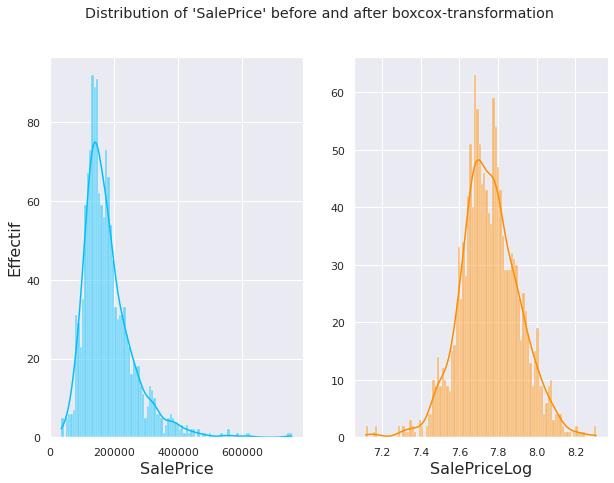

In [340]:
# Log transformation of the target variable "SalePrice"
#applying lock trasformation, see ther distibution
import scipy.stats as stats

df_train_new['SalePriceLog'],parameters=stats.boxcox(df_train_new['SalePrice']) 

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'SalePrice' before and after boxcox-transformation")

# before log transformation
p = sns.histplot(ax=axes[0], x=df_train_new["SalePrice"],
                 kde=True, bins=100, color="deepskyblue")
p.set_xlabel("SalePrice", fontsize=16)
p.set_ylabel("Effectif", fontsize=16)

# after log transformation
q = sns.histplot(ax=axes[1], x=df_train_new["SalePriceLog"],
                 kde=True, bins=100, color="darkorange")
q.set_xlabel("SalePriceLog", fontsize=16)
q.set_ylabel("", fontsize=16)
# after log transformation


In [341]:
# Drop the original SalePrice
df_train_new.drop(["SalePrice"], axis=1, inplace=True)

## **III.2. Train Test Split Data and Standardization**

In [342]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train_new[[i for i in list(
    df_train_new.columns) if i != "SalePriceLog"]]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

(1454, 132)
(1454,)


In [343]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1163, 132)
y_train:(1163,)

X_test:(291, 132)
y_test:(291,)


In [344]:
# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
# The same standardization is applied for df_test_new
df_test_new = std_scale.transform(df_test_new)

# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

## **III.3. Backward Stepwise Regression**


**Backward Stepwise Regression at each step gradually eliminates variables from the regression model to find a reduced model that best explains the data. Also known as Backward Elimination regression.**


In [1]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
# backward_regression(X_train, y_train)

In [346]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]
df_test_new = df_test_new.loc[:, Selected_Features[0]]

## **III.4. Cook distance**

**Using Cook distance we can detects data with large residuals (outliers) that can distort the prediction and the accuracy of a regression.**

In [347]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

,Cook_Distance,p_value
0,0.00,1.00
1,0.01,1.00
2,0.00,1.00
3,0.00,1.00
4,0.00,1.00


In [348]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: []


# **IV. Modeling**

##  **IV.1. Models, metrics selection**

In [349]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [350]:
# defining function for each metrics

# R²_score
def rsqr_score(test, pred):
    r2_ = r2_score(test, pred)
    return r2_

# RMSE
def rmse_score(test, pred):
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_

# Print the scores
def print_score(test, pred): 
    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")
    # Args:
    #     test -- test data
    #     pred -- predicted data
    # Returns:
    #     print the regressor name
    #     print the R squared score
    #     print Root Mean Square Error score

In [351]:
# Define regression models
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
svr = SVR()
knn= KNeighborsRegressor()
rdf = RandomForestRegressor()
dc =  DecisionTreeRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()


# Train models on X_train and y_train
for regr in [ridge, lasso, elastic, svr, knn, dc, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: Ridge
R²: 0.9038531338812233
RMSE: 0.04751633902531386

- Regressor: Lasso
R²: 0.907241216158122
RMSE: 0.04667162569577491

- Regressor: ElasticNet
R²: 0.9065107256467808
RMSE: 0.046855038624352766

- Regressor: SVR
R²: 0.8222430661944726
RMSE: 0.06460835461247247

- Regressor: KNeighborsRegressor
R²: 0.7800461554912249
RMSE: 0.07186893089159212

- Regressor: DecisionTreeRegressor
R²: 0.6959676351912598
RMSE: 0.08449583742599914

- Regressor: RandomForestRegressor
R²: 0.8731134556615607
RMSE: 0.05458624130331741

- Regressor: XGBRegressor
R²: 0.8683929846671365
RMSE: 0.05559233628699585

- Regressor: LGBMRegressor
R²: 0.8813091463890541
RMSE: 0.052793934881492095



**According to the result of R² and Root Mean Squared of these 9 models, we can conclude that the relationship between the features and the target variable is clearly linear.**

##**IV.2. Hyperparameters tuning and model optimization**

###**IV.2.1. Ridge regression**

**Ridge will reduce the impact of features that are not important in predicting the target values.**
    



In [352]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 54.286754393238596}
Best R² (train): 0.8974113983495732


In [353]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_mod.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: 0.9059746430266781
RMSE: 0.04698918378163605


In [354]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

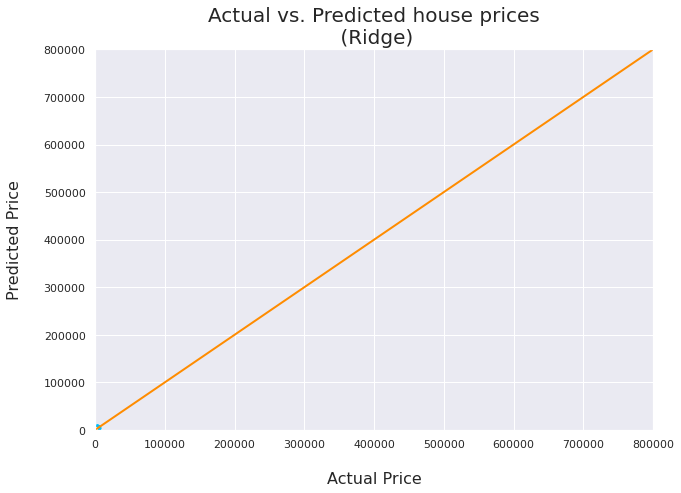

In [355]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### **IV.2.2. Lasso regression**

**Lasso will eliminate many features, and reduce overfitting in the linear model.**


In [356]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 1e-05}
Best R² (train): 0.8966521125331323


In [357]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fit the model on train set
lasso_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Lasso
R²: 0.9038408117152147
RMSE: 0.04751938377072732


In [358]:
# Save the model results into lists
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

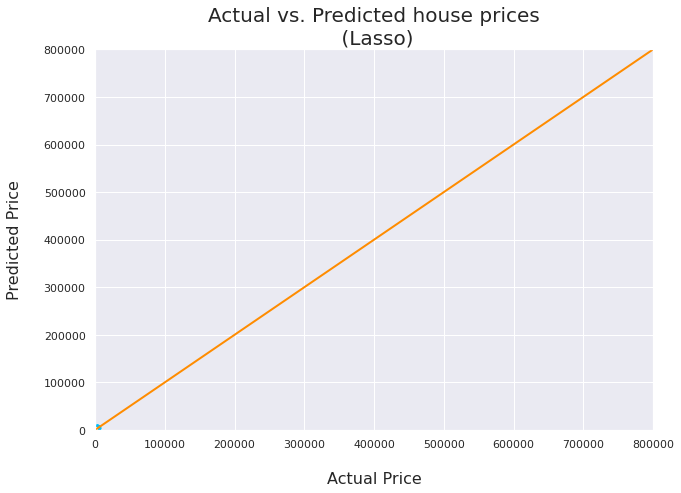

In [359]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### **IV.2.3. XGBoost regression**

In [360]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3],
                    "colsample_bytree": [0.3, 0.7],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.8895447693897094


In [361]:
# XGB Regressor with the best hyperparameters
xgbr_mod = XGBRegressor(seed=20,
                        colsample_bytree=xgbr_cv.best_params_["colsample_bytree"],
                        learning_rate=xgbr_cv.best_params_["learning_rate"],
                        max_depth=xgbr_cv.best_params_["max_depth"],
                        n_estimators=xgbr_cv.best_params_["n_estimators"])

# Fit the model on train set
xgbr_mod.fit(X_train, y_train)

# Predict on test set
y_pred = xgbr_mod.predict(X_test)

print(f"- {xgbr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- XGBRegressor
R²: 0.9076703623223032
RMSE: 0.046563537987457736


In [362]:
# Save the model results into lists
model_list.append(xgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

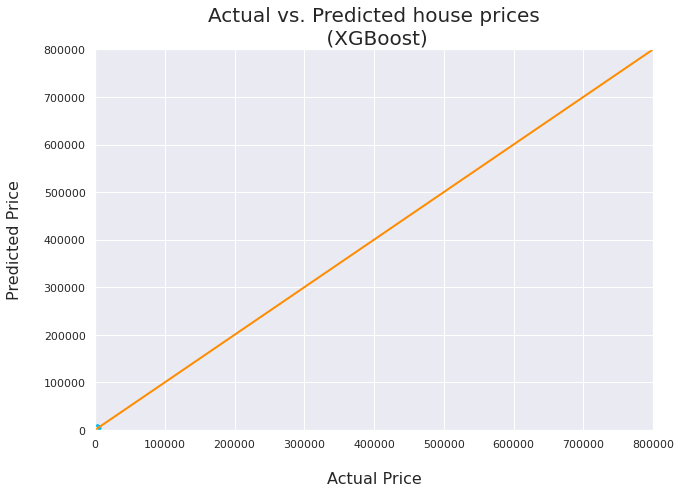

In [363]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### **IV.2.4. LightGBM regression**

**LightGBM is also one of the most popular algorithms that are based on Gradient Boosted Machines.**


In [364]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3, 6, 10], "learning_rate": [
    0.01, 0.05, 0.1], "n_estimators": [100, 500, 1000], }

# GridSearch
lgbm_cv = GridSearchCV(estimator=LGBMRegressor(
), param_grid=tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lgbm_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lgbm_cv.best_params_}\n")
print(f"Best R²: {lgbm_cv.best_score_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.8739222541720799


In [365]:
# LGBM Regressor with the best hyperparameters
lgbm_mod = LGBMRegressor(learning_rate=lgbm_cv.best_params_["learning_rate"],
                         max_depth=lgbm_cv.best_params_["max_depth"],
                         n_estimators=lgbm_cv.best_params_["n_estimators"])

# Fit the model on train set
lgbm_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lgbm_mod.predict(X_test)

print(f"- {lgbm_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- LGBMRegressor
R²: 0.8909878630595635
RMSE: 0.05059560953823799


In [366]:
# Save the model results into lists
model_list.append(lgbm_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

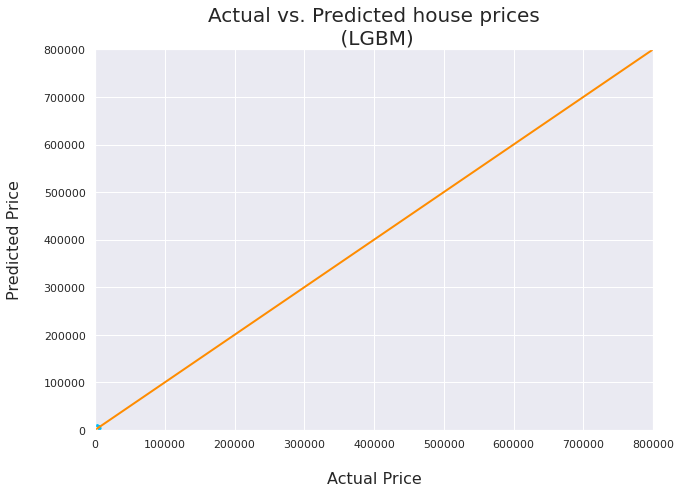

In [367]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (LGBM)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

## **IV.3. Choosing the best model**

In [368]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

,Model,R²,RMSE
0,Ridge,0.91,0.05
1,Lasso,0.90,0.05
2,XGBRegressor,0.91,0.05
3,LGBMRegressor,0.89,0.05


**The results are the best performances in terms of R squared (R²) and Root Mean Square Error (RMSE) correspond to Ridge, Lasso , LGMRegressor and XGB Regressor.**
     
**Based on these results, we can conclude that the XGB Regressor model gives us the best performance.**
